<a href="https://colab.research.google.com/github/sg758253/IDS/blob/main/HW4/problem2_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
#Import library
library(readr)
library(stringr)
library(dplyr)

In [120]:
# read csv
df <- read_csv("https://raw.githubusercontent.com/sg758253/IDS/main/HW4/nutrition_subset.csv")

Rows: 961 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): food_item
dbl (3): weight_in_grams, saturated_fat, cholesterol

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Dataset has 961 rows and 4 columns

In [121]:
# column names
colnames(df)

[1] "food_item"       "weight_in_grams" "saturated_fat"   "cholesterol"

In [122]:
head(df,10)

food_item,weight_in_grams,saturated_fat,cholesterol
<chr>,<dbl>,<dbl>,<dbl>
GELATIN; DRY 1 ENVELP,7.00,0.0,0
SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0
YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0
PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22
PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79
PARMESAN CHEESE; GRATED 1 TBSP,5.00,1.0,4
YEAST; BREWERS; DRY 1 TBSP,8.00,0.0,0
LAMB;CHOPS;ARM;BRAISED;LEAN 1.7 OZ,48.00,2.9,59
TUNA; CANND; DRND;WATR; WHITE 3 OZ,85.00,0.3,48


In [123]:
#Checking missing values
sum(is.na(df))

[1] 0

# 3. Sort the data set by saturated_ fat and produce a listing of the five food items highest in saturated fat. Comment on the validity of comparing food items of different sizes.

In [124]:
#Sorting saturated fat into desending order
head(df[order(df$saturated_fat, decreasing=TRUE), 1:4])


food_item,weight_in_grams,saturated_fat,cholesterol
<chr>,<dbl>,<dbl>,<dbl>
CHEESECAKE 1 CAKE,1110,119.9,2053
ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188,118.3,703
YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108,92.0,609
CREME PIE 1 PIE,910,90.1,46
LARD 1 CUP,205,80.4,195
ICE CREAM; VANLLA; REGULR 11% 1/2 GALN,1064,71.3,476


food item 'CHEESECAKE 1 CAKE' has the highest cholesterol

#4. Create a new variable, saturated fat pergram, by dividing the amount of saturated fat by the weight in grams. Sort the data set by saturated fat_ per_gram and produce a listing of the five food items highest in saturated fat per gram. Which food has the most saturated fat per gram?

In [125]:
df$saturated_fat_per_gram <- df$saturated_fat/df$weight_in_grams

In [126]:
head(df[order(df$saturated_fat_per_gram, decreasing=TRUE), 1:5])

food_item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
BUTTER; SALTED 1 TBSP,14,7.1,31,0.5071429
BUTTER; UNSALTED 1 TBSP,14,7.1,31,0.5071429
BUTTER; SALTED 1/2 CUP,113,57.1,247,0.5053097
BUTTER; UNSALTED 1/2 CUP,113,57.1,247,0.5053097
BUTTER; SALTED 1 PAT,5,2.5,11,0.5000000
BUTTER; UNSALTED 1 PAT,5,2.5,11,0.5000000


In [127]:
summary(df$saturated_fat_per_gram)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00800 0.03717 0.04735 0.50714 

In [128]:
zscore=abs((df$saturated_fat_per_gram-mean(df$saturated_fat_per_gram))/sd(df$saturated_fat_per_gram))

In [129]:
mean = mean(df$saturated_fat_per_gram)
std = sd(df$saturated_fat_per_gram)
df['saturated_fat_per_gram1'] = (df$saturated_fat_per_gram-mean)/std
head(df)

food_item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram,saturated_fat_per_gram1
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GELATIN; DRY 1 ENVELP,7.00,0.0,0,0.00000000,-0.5620426
SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0,0.02821869,-0.1353304
YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0,0.00000000,-0.5620426
PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22,0.19047619,2.3182645
PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79,0.19100000,2.3261853
PARMESAN CHEESE; GRATED 1 TBSP,5.00,1.0,4,0.20000000,2.4622798


In [130]:
# finding upper and lower bound
q1 <- quantile(df$saturated_fat_per_gram1,0.25)
q3 <- quantile(df$saturated_fat_per_gram1,0.75)
IQR <- q3-q1
lower_bound<-q1-(1.5 * IQR)
upper_bound<-q3 +(1.5 * IQR)
cat("lower_bound: ", lower_bound)
cat("upper_bound: ", upper_bound)

lower_bound:  -1.635986upper_bound:  1.227863

In [131]:
df_saturated_fat_per_gram1 <- df[(df$saturated_fat_per_gram1< lower_bound) | (df$saturated_fat_per_gram1> upper_bound),]
count(df_saturated_fat_per_gram1)

n
<int>
85


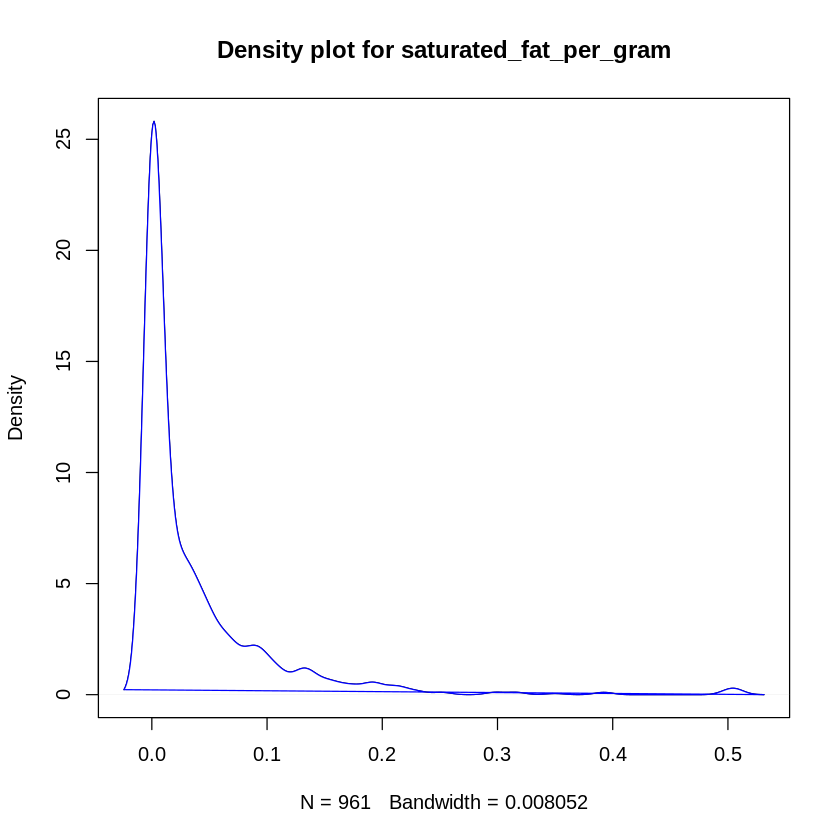

In [132]:
#Density Plot for  df_saturated_fat_per_gram
par(mfrow=c(1,1))
saturated_fat_per_gram_1 <- density(df$saturated_fat_per_gram) 
plot(saturated_fat_per_gram_1, main="Density plot for saturated_fat_per_gram") 
polygon(saturated_fat_per_gram_1, col="white", border="blue")

There are 85 outliers for saturated_fat_per_gram1

6. Are there any missing values? If so, impute as necessary and explain your approach.

In [133]:
#Checking missing values
sum(is.na(df))

[1] 0

#7. Standardize (zero mean) the numeric variables, and determine if there are any outliers.

# 7.1 numeric field - weight_in_grams

In [134]:
summary(df['weight_in_grams'])

 weight_in_grams 
 Min.   :   0.4  
 1st Qu.:  32.0  
 Median : 113.0  
 Mean   : 149.4  
 3rd Qu.: 218.0  
 Max.   :1542.0  

In [135]:
mean = mean(df$weight_in_grams)
std = sd(df$weight_in_grams)
df['weight_in_grams1'] = (df$weight_in_grams-mean)/std
head(df)

food_item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram,saturated_fat_per_gram1,weight_in_grams1
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GELATIN; DRY 1 ENVELP,7.00,0.0,0,0.00000000,-0.5620426,-0.8095611
SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0,0.02821869,-0.1353304,-0.6881917
YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0,0.00000000,-0.5620426,-0.8095611
PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22,0.19047619,2.3182645,-0.6881917
PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79,0.19100000,2.3261853,-0.2808797
PARMESAN CHEESE; GRATED 1 TBSP,5.00,1.0,4,0.20000000,2.4622798,-0.8209306


In [136]:
# finding upper and lower bound
q1 <- quantile(df$weight_in_grams1,0.25)
q3 <- quantile(df$weight_in_grams1,0.75)
IQR <- q3-q1
lower_bound<-q1-(1.5 * IQR)
upper_bound<-q3 +(1.5 * IQR)
cat('lower_bound',lower_bound)
cat('\nupper_bound',upper_bound)

lower_bound -2.253487
upper_bound 1.975964

In [137]:
df_weight_in_grams1 <- df[(df$weight_in_grams1< lower_bound) | (df$weight_in_grams1> upper_bound),]
count(df_weight_in_grams1)

n
<int>
27


There are 27 outliers for weight_in_grams

# 7.2 numeric field - cholesterol

In [139]:
summary(df['cholesterol'])

  cholesterol     
 Min.   :   0.00  
 1st Qu.:   0.00  
 Median :   0.00  
 Mean   :  32.55  
 3rd Qu.:  20.00  
 Max.   :2053.00  

In [140]:
mean = mean(df$cholesterol)
std = sd(df$cholesterol)
df['cholesterol1'] = (df$cholesterol-mean)/std
head(df)

food_item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram,saturated_fat_per_gram1,weight_in_grams1,cholesterol1
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GELATIN; DRY 1 ENVELP,7.00,0.0,0,0.00000000,-0.5620426,-0.8095611,-0.27136904
SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0,0.02821869,-0.1353304,-0.6881917,-0.27136904
YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0,0.00000000,-0.5620426,-0.8095611,-0.27136904
PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22,0.19047619,2.3182645,-0.6881917,-0.08797548
PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79,0.19100000,2.3261853,-0.2808797,0.38718057
PARMESAN CHEESE; GRATED 1 TBSP,5.00,1.0,4,0.20000000,2.4622798,-0.8209306,-0.23802475


In [141]:
# finding upper and lower bound
q1 <- quantile(df$cholesterol1,0.25)
q3 <- quantile(df$cholesterol1,0.75)
IQR <- q3-q1
lower_bound<-q1-(1.5 * IQR)
upper_bound<-q3 +(1.5 * IQR)
cat('lower_bound',lower_bound)
cat('\nupper_bound',upper_bound)

lower_bound -0.5214512
upper_bound 0.1454345

In [142]:
df_cholesterol1 <- df[(df$cholesterol1< lower_bound) | (df$cholesterol1> upper_bound),]
count(df_cholesterol1)

n
<int>
146


There are 146 outliers for cholesterol

**Summary**

1. There is no missing value/null value/unknown value in dataset and dataset has 961 rows.
2. food item 'CHEESECAKE 1 CAKE' has the highest saturated_fat.
3. food item 'BUTTER; SALTED 1 TBSP' has the highest sat.urated_fat in per gram.
4. There are 85 outliers for saturated_fat_per_gram
5. There are 27 outliers for weight_in_grams and 146 for cholesterol.